In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd


ModuleNotFoundError: No module named 'librosa'

In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
import IPython.display as ipd


In [30]:
CREMA  = "C:\\Users\\dell\\Desktop\\graduation project\\AI04-Grad\\datasets\\CREMA-D\\AudioWAV"


In [31]:
dir_list= os.listdir(CREMA )
dir_list.sort()
dir_list[:5]

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav']

In [32]:
# Initialize lists to hold data
emotionG = []
gender = []
emotionO = []
path = []
female_ids = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,
              1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,1052,1053,1054,
              1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,
              1082,1084,1089,1091]

temp_dict = {"SAD":"sad", "ANG": "angry", "DIS":"disgust", "FEA":"fear", 
             "HAP":"happy", "NEU":"neutral"}

def get_emotion_crema(filename, ids=female_ids, dc=temp_dict):
  filename = filename.split("_")
  emotionG1 = dc[filename[2]]
  if int(filename[0]) in ids:
    emotionG2 = "_female"
  else:
    emotionG2 = "_male"
  emotionG = emotionG1 + emotionG2
  return (emotionG, emotionG1, emotionG2[1:])


# Process each file in the directory
for i in dir_list:
    emotionG.append(get_emotion_crema(i)[0])
    emotionO.append(get_emotion_crema(i)[1])
    gender.append(get_emotion_crema(i)[2])
    path.append(os.path.join(CREMA, i))  # Correctly construct the full path


In [33]:
# Create the DataFrame
CREMA_df = pd.DataFrame(emotionG, columns=['emotionG_label'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df, pd.DataFrame(gender, columns=['gender'])], axis=1)
CREMA_df = pd.concat([CREMA_df, pd.DataFrame(emotionO, columns=['emotion'])], axis=1)
CREMA_df = pd.concat([CREMA_df, pd.DataFrame(path, columns=['path'])], axis=1)


In [34]:
CREMA_df.head()
print(CREMA_df.emotionG_label.value_counts())


emotionG_label
angry_male        671
disgust_male      671
fear_male         671
happy_male        671
sad_male          671
angry_female      600
disgust_female    600
fear_female       600
happy_female      600
sad_female        600
neutral_male      575
neutral_female    512
Name: count, dtype: int64


In [ ]:
CREMA_df_summary = CREMA_df.pivot_table(index='emotion', columns='gender', aggfunc=len, values = 'source')
CREMA_df_summary


gender,female,male
emotion,,
angry,600,671
disgust,600,671
fear,600,671
happy,600,671
neutral,512,575
sad,600,671


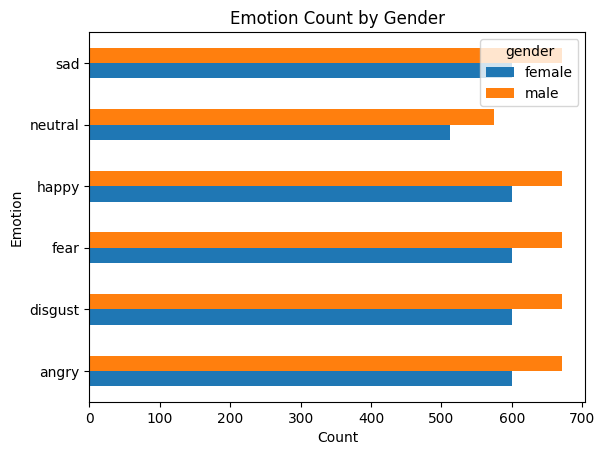

In [35]:
CREMA_df_summary.plot(kind='barh')
plt.title("Emotion Count by Gender")
plt.xlabel("Count")
plt.ylabel("Emotion")
plt.show()



In [36]:
# Waveplot section
# Number of files


In [37]:
n_files = CREMA_df.shape[0]


In [38]:
# Choose a random file
rnd = np.random.randint(0, n_files)
print(f"Random index: {rnd}")

# Get the info from the DataFrame
info = CREMA_df.iloc[rnd].values


Random index: 7300


In [39]:
# Extract the filename and ensure it's properly formatted
file_name = info[3]  # Assuming the 'path' column is at index 3



In [40]:
# Check if the file exists before loading
if os.path.exists(file_name):
    # Load the audio file
    data, sampling_rate = librosa.load(file_name, sr=44100)

    # Plot the waveform
    plt.figure(figsize=(15, 5))
    title_txt = f'{info[2]} voice - {file_name} emotion - [{os.path.basename(file_name)}]'
    plt.title(title_txt.upper(), size=16)
    librosa.display.waveshow(data, sr=sampling_rate)

    # Play the audio
    ipd.display(ipd.Audio(file_name))
else:
    print(f"File not found: {file_name}")


File not found: angry


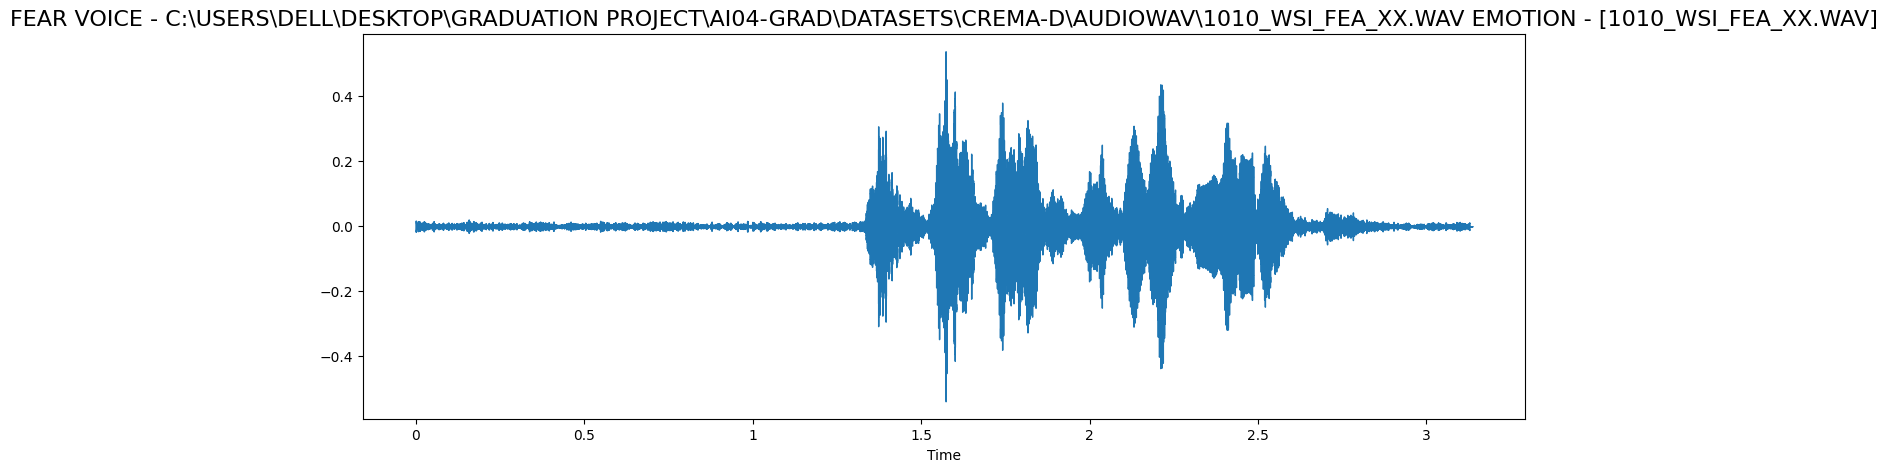

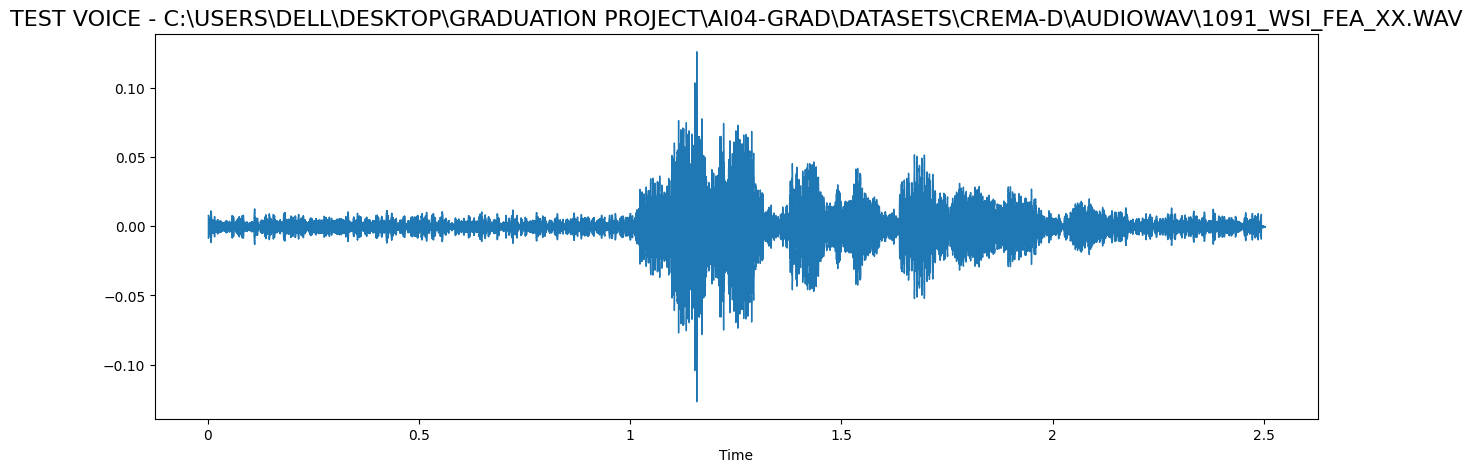

In [45]:

# Check if the file exists before loading
if os.path.exists(file_name):
    try:
        # Load the audio file
        data, sampling_rate = librosa.load(file_name, sr=44100)

        # Plot the waveform
        plt.figure(figsize=(15, 5))
        title_txt = f'{emotion_label} voice - {file_name} emotion - [{os.path.basename(file_name)}]'
        plt.title(title_txt.upper(), size=16)
        librosa.display.waveshow(data, sr=sampling_rate)

        # Play the audio
        ipd.display(ipd.Audio(file_name))
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
else:
    print(f"File not found: {file_name}")

# Optional: Test with a hardcoded valid file
test_file = "C:\\Users\\dell\\Desktop\\graduation project\\AI04-Grad\\datasets\\CREMA-D\\AudioWAV\\1091_WSI_FEA_XX.wav"

if os.path.exists(test_file):
    try:
        # Load the audio file
        data, sampling_rate = librosa.load(test_file, sr=44100)

        # Plot the waveform
        plt.figure(figsize=(15, 5))
        title_txt = f'Test voice - {test_file}'
        plt.title(title_txt.upper(), size=16)
        librosa.display.waveshow(data, sr=sampling_rate)

        # Play the audio
        ipd.display(ipd.Audio(test_file))
    except Exception as e:
        print(f"An error occurred while loading the test file: {e}")
else:
    print(f"Test file not found: {test_file}")


In [46]:
#Linear Spectogram:


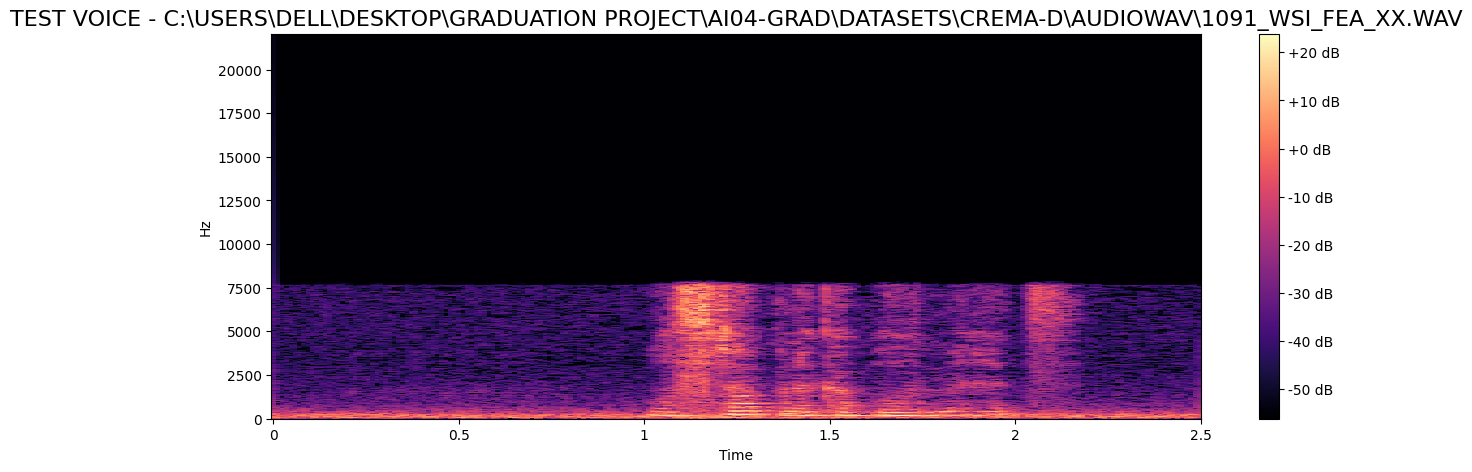

In [47]:
X = librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title(title_txt.upper(), size=16)
plt.show()

In [53]:
def extract_mel_spectrogram(file_path, sr=44100, n_mels=128, duration=5):
    """Extract Mel spectrogram from an audio file."""
    # Load audio file
    data, _ = librosa.load(file_path, sr=sr, duration=duration)
    # Extract Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=n_mels)
    # Convert to log scale (dB)
    mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
    return mel_spectrogram_db

# Example usage
sample_file = CREMA_df['path'][0]  # Change index as needed
mel_spec = extract_mel_spectrogram(sample_file)


In [55]:
import numpy as np
import concurrent.futures
import librosa

def extract_mel_spectrogram(file_path, sr=44100, n_mels=128, max_length=128):
    """Extract Mel spectrogram from an audio file and ensure uniform shape."""
    # Load the audio file
    data, _ = librosa.load(file_path, sr=sr)
    
    # Extract Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=n_mels)
    mel_spectrogram_db = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
    
    # Pad or truncate the spectrogram to ensure it has a uniform shape
    if mel_spectrogram_db.shape[1] < max_length:
        # Pad with zeros if spectrogram is shorter than max_length
        pad_width = max_length - mel_spectrogram_db.shape[1]
        mel_spectrogram_db = np.pad(mel_spectrogram_db, ((0, 0), (0, pad_width)), mode='constant')
    elif mel_spectrogram_db.shape[1] > max_length:
        # Truncate if spectrogram is longer than max_length
        mel_spectrogram_db = mel_spectrogram_db[:, :max_length]

    return mel_spectrogram_db

def extract_mel_spectrogram_parallel(file_info):
    file_path, emotion = file_info
    mel_spec = extract_mel_spectrogram(file_path)
    return mel_spec, emotion

# Create a list of tuples (file_path, emotion)
file_info_list = list(zip(CREMA_df['path'], CREMA_df['emotion']))

# Process audio files in parallel
mel_spectrograms = []
labels = []

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = list(executor.map(extract_mel_spectrogram_parallel, file_info_list))

for mel_spec, emotion in results:
    mel_spectrograms.append(mel_spec)
    labels.append(emotion)

# Convert lists to NumPy arrays for model training
mel_spectrograms = np.array(mel_spectrograms)
labels = np.array(labels)

# Check the shapes of the spectrograms and labels
print("Mel Spectrograms Shape:", mel_spectrograms.shape)
print("Labels Shape:", labels.shape)


Mel Spectrograms Shape: (7442, 128, 128)
Labels Shape: (7442,)


c:\Users\dell\Desktop\graduation project\AI04-Grad\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 87s 446ms/step - accuracy: 0.1727 - loss: 3.0324 - val_accuracy: 0.1719 - val_loss: 2.1404
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 81s 432ms/step - accuracy: 0.1706 - loss: 1.8245 - val_accuracy: 0.1592 - val_loss: 2.0903
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 81s 434ms/step - accuracy: 0.1779 - loss: 1.7923 - val_accuracy: 0.1592 - val_loss: 2.0348
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 81s 433ms/step - accuracy: 0.1804 - loss: 1.7953 - val_accuracy: 0.1612 - val_loss: 2.1331
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 437ms/step - accuracy: 0.1730 - loss: 1.7892 - val_accuracy: 0.1612 - val_loss: 2.1247
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 437ms/step - accuracy: 0.1703 - loss: 1.7988 - val_accuracy: 0.1578 - val_loss: 1.8919
Epoch 7/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 81s 432ms/step - accuracy: 0.1874 - loss: 1.7894 - val_accuracy: 0.1612 - val_loss: 1.8946
Epoch 8/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 80s 426ms/step - accuracy: 0.1794 - loss: 1

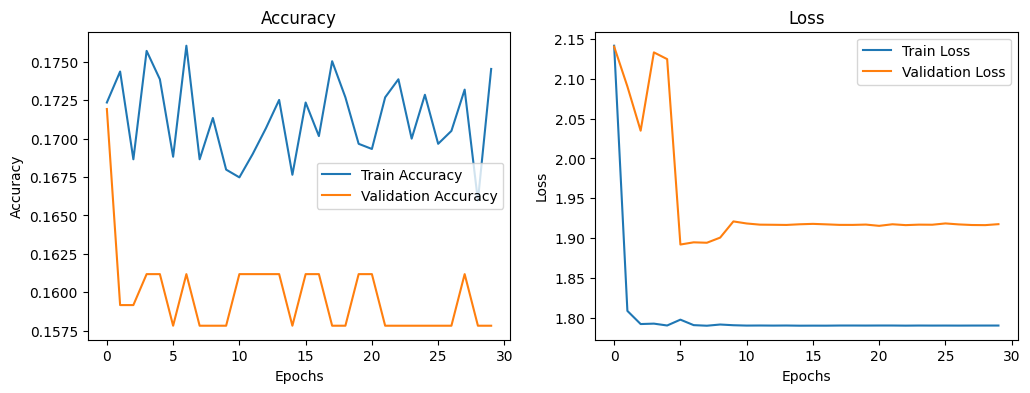

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# 1. Preprocess the data
# Normalize the mel spectrograms
mel_spectrograms = mel_spectrograms / np.max(mel_spectrograms)

# Reshape for CNN input (add channel dimension)
X = mel_spectrograms[..., np.newaxis]

# Convert labels to categorical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# 2. Define the CNN model
model = Sequential()

# Convolutional layers with batch normalization and max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output layer (number of emotions)
model.add(Dense(y_categorical.shape[1], activation='softmax'))

# 3. Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# 4. Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# 5. Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# 6. Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [57]:
####### generative ai part trial ##############
#I will try to generate text and music using spotify api 